In [5]:
import pandas as pd
from conceptualDesign.conceptualDesign import conceptualDesign
from misc.openData import openData
from misc.materials import load_materials
import matplotlib.pyplot as plt
import numpy as np

In [12]:
import numpy as np
test_data = np.load("./graphData/test.npy")

In [6]:
blimp_data = np.load("graphData/blimp-mode.npy")
plane_data = np.load("graphData/plane-mode.npy")
velocityStart, velocityEnd, rangeEnd, rangeStart, steps = 30, 150, 5000000, 10000000, 50
rangeSteps = np.linspace(rangeEnd, rangeStart, num=steps + 1)
velocitySteps = np.linspace(velocityStart, velocityEnd, num=steps + 1)

In [40]:
blimp_data_lin = blimp_data.reshape(50*50)

(array([1342.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1158.]),
 array([1.13321494e+004, 1.64971554e+279, 3.29943108e+279, 4.94914662e+279,
        6.59886216e+279, 8.24857770e+279, 9.89829325e+279, 1.15480088e+280,
        1.31977243e+280, 1.48474399e+280, 1.649715

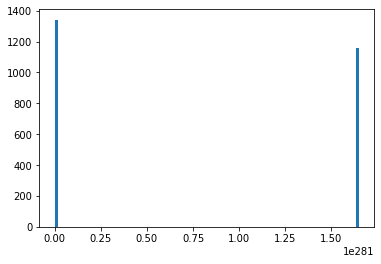

In [45]:
plt.hist(sorted(blimp_data_lin), bins=100)

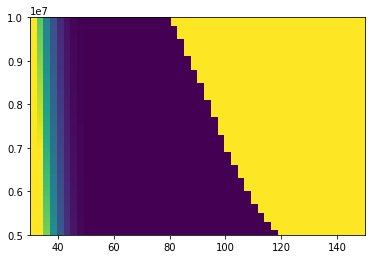

In [37]:
fig = plt.figure()
plt.pcolormesh(velocitySteps, rangeSteps, np.log(blimp_data))
plt.savefig("blimp-speed-range")

In [38]:
plane_data.min()

40667.798716719015

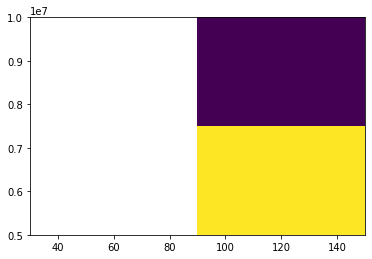

In [51]:
comp_ratio_data = np.load("graphData/comp-ratios.npy")
velocityStart, velocityEnd, rangeEnd, rangeStart, steps = 30, 150, 5000000, 10000000, 2
rangeSteps = np.linspace(rangeEnd, rangeStart, num=steps + 1)
velocitySteps = np.linspace(velocityStart, velocityEnd, num=steps + 1)
plt.pcolormesh(velocitySteps, rangeSteps, comp_ratio_data)
plt.savefig("plane-speed-range")

In [52]:
comp_ratio_data

array([[ nan, 700.],
       [ nan,  10.]])

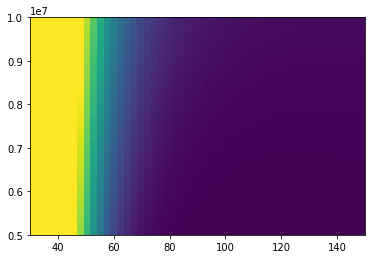

In [27]:
plt.pcolormesh(velocitySteps, rangeSteps, np.log(plane_data))
plt.savefig("plane-speed-range")

In [46]:
material_data: dict = load_materials()
iters = 50

parameters = openData("design1")
params, df = conceptualDesign(parameters, material_data, iters)

df["liftRatio"] = df["balloonLift"] / (df["totalMass"] * 9.81)
df["balloonLength"] = df["balloonVolume"] / df["balloonArea"]
df[["fuelMass", "balloonVolume", "requiredEnergy", "totalMass", "balloonLift", "liftRatio", "balloonLength", "balloonArea", "wingArea", "propulsionMass"]]

,fuelMass,balloonVolume,requiredEnergy,totalMass,balloonLift,liftRatio,balloonLength,balloonArea,wingArea,propulsionMass
0,11073.867315,0.000000,1.339495e+12,109924.586470,0.000000e+00,0.000000,NaN,0.000000,184.832035,1635.862273
1,20348.805797,105780.225102,2.461392e+12,190465.750227,1.015377e+06,0.543427,248.384229,425.873355,14.751782,3005.981809
2,26498.664383,194376.652389,3.205278e+12,269266.692402,1.865808e+06,0.706342,304.231296,638.910772,0.476609,3914.455909
3,31274.419814,253121.570222,3.782954e+12,325889.197960,2.429696e+06,0.759999,332.224947,761.898144,49.688902,4619.943695
4,34560.443142,298740.726583,4.180431e+12,369356.286269,2.867591e+06,0.791412,351.091784,850.890680,77.343544,5105.364139
5,36963.926604,330129.606130,4.471157e+12,400644.696639,3.168891e+06,0.806267,362.981101,909.495303,106.785145,5460.413356
6,38661.515631,353088.254127,4.676497e+12,423499.160647,3.389270e+06,0.815802,371.207674,951.187918,127.153776,5711.185897
7,39881.282822,369304.029909,4.824040e+12,439926.742619,3.544924e+06,0.821405,376.805475,980.091996,143.285368,5891.373276
8,40750.114947,380955.537402,4.929134e+12,451762.543681,3.656766e+06,0.825122,380.727241,1000.599631,154.890212,6019.719558
9,41371.749632,389254.829342,5.004327e+12,460251.598789,3.736430e+06,0.827547,383.472176,1015.079719,163.467113,6111.549151


In [12]:
material_data: dict = load_materials()
iters = 50

parameters = openData("design2")
params, df = conceptualDesign(parameters, material_data, iters)

df["liftRatio"] = df["balloonLift"] / (df["totalMass"] * 9.81)
df["balloonLength"] = df["balloonVolume"] / df["balloonArea"]
df[["fuelMass", "balloonVolume", "requiredEnergy", "totalMass", "balloonLift", "liftRatio", "balloonLength", "balloonArea", "wingArea"]]

,fuelMass,balloonVolume,requiredEnergy,totalMass,balloonLift,liftRatio,balloonLength,balloonArea,wingArea
0,14731.668436,0.000000,1.781943e+12,110835.060880,-0.000000,-0.000000,NaN,0.000000,122.170689
1,17311.545422,251.645949,2.094005e+12,223192.794510,-141794.436124,-0.064760,33.157810,7.589342,191.340784
2,23012.628952,295.715336,2.783608e+12,279492.550415,-166626.124673,-0.060772,34.990257,8.451362,366.792952
3,26143.677488,393.101086,3.162339e+12,341167.373395,-221499.876949,-0.066182,38.473108,10.217555,461.315378
4,29375.912901,446.585570,3.553310e+12,388113.888331,-251636.671275,-0.066092,40.144318,11.124503,560.194104
5,31886.891933,501.798525,3.857038e+12,430789.030625,-282747.403895,-0.066906,41.734862,12.023486,636.732401
6,34142.268671,544.690999,4.129849e+12,467157.737903,-306915.939687,-0.066971,42.891634,12.699236,705.666673
7,36070.672614,583.217281,4.363109e+12,499411.630647,-328624.266499,-0.067077,43.879936,13.291206,764.587062
8,37776.086607,616.158224,4.569395e+12,527820.763192,-347185.432935,-0.067051,44.690986,13.787080,816.733490
9,39278.288524,645.290058,4.751102e+12,553129.500298,-363600.288899,-0.067008,45.384496,14.218293,862.674223


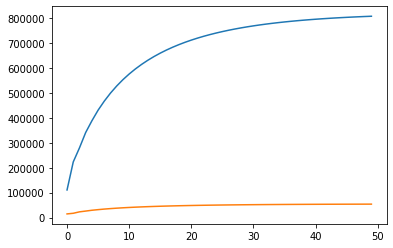

In [13]:
plt.plot(df.index, df.totalMass, df.fuelMass)

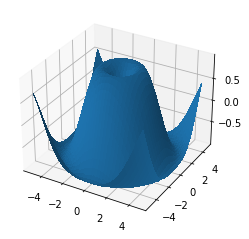

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# Make data.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)


In [9]:
X.shape, Y.shape, Z.shape

((40, 40), (40, 40), (40, 40))